# <center> Exploration du Dataset </center>

### PART1 : Analayse et import des Datasets

On commence par les imports de base afin de pouvoir accéder au code présent dans le dossier src/.

In [37]:
import sys
from pathlib import Path

PROJECT_ROOT = Path().resolve().parent
sys.path.append(str(PROJECT_ROOT))

import src.dataset as dataset_module
from importlib import reload

dataset_module = reload(dataset_module)

On importe ensuite le dataset décomposé en trois sous-dataset train, val et test. On les regroupe aussi afin d'accéder au dataset global sans split, pour l'exploration.

In [38]:
df_test, df_train, df_val = dataset_module.load_df_train_test_val()
df = dataset_module.load_df()

On observe la taille des split afin de vérifier la bonne répartition.

In [39]:
# A MODIFIER CAR LA JE SAIS PAS CE QUE CA FAIT
df_train.value_counts()
df_val.value_counts()
df_test.value_counts()


filename  style  artist  genre  style_name                  artist_name        genre_name        
999.jpg   23     7       3      Romanticism                 gustave-dore       illustration          1
1000.jpg  13     0       8      Mannerism_Late_Renaissance  Unknown Artist     sketch_and_study      1
1003.jpg  8      0       6      Early_Renaissance           Unknown Artist     portrait              1
101.jpg   3      0       1      Art_Nouveau                 Unknown Artist     cityscape             1
1010.jpg  23     35      6      Romanticism                 francisco-goya     portrait              1
                                                                                                    ..
1127.jpg  21     10      4      Realism                     ivan-shishkin      landscape             1
1136.jpg  18     0       4      Pointillism                 Unknown Artist     landscape             1
1138.jpg  4      80      7      Baroque                     peter-paul-rubens 

#### Ce serait bien d'analyser le nombre d'artiste, nombre de genre, nombre de style, avoir une liste ici des noms etc

In [40]:
#TODO

### PART2 : Visualisation du Dataset

On visualise les différents styles présents dans le Dataset :

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\julie\\OneDrive - CentraleSupelec\\cours\\3A\\Mention IA\\Projet DL +recVi\\deepl-projet\\data\\train\\2\\9095.jpg'

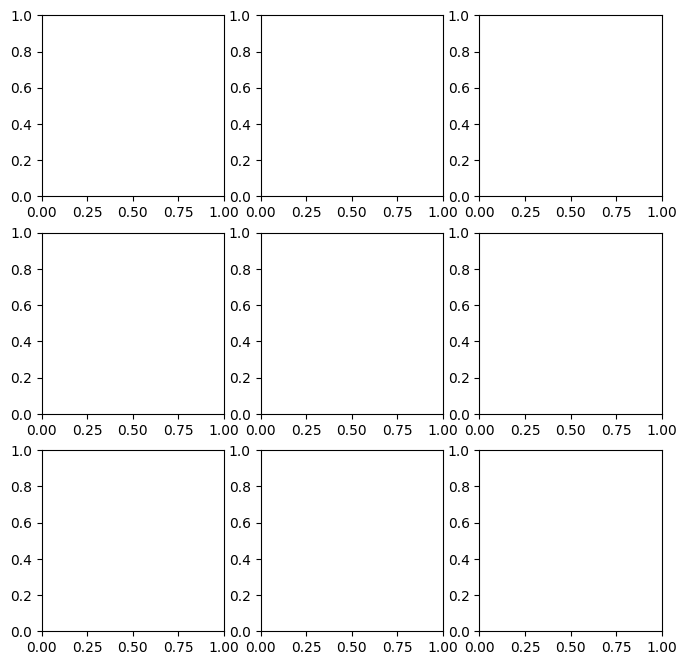

In [41]:
dataset_module.visualize_data(df) #SOUCIS DE PATH A REGLER AVEC CHAT

On étudie ensuite la variabilité intra style et inter style : à quel point les oeuvres représentant un certain style peuvent être différentes, et à quel point les oeuvre entre les différents styles diffèrent également.

OSError: [Errno 22] Invalid argument

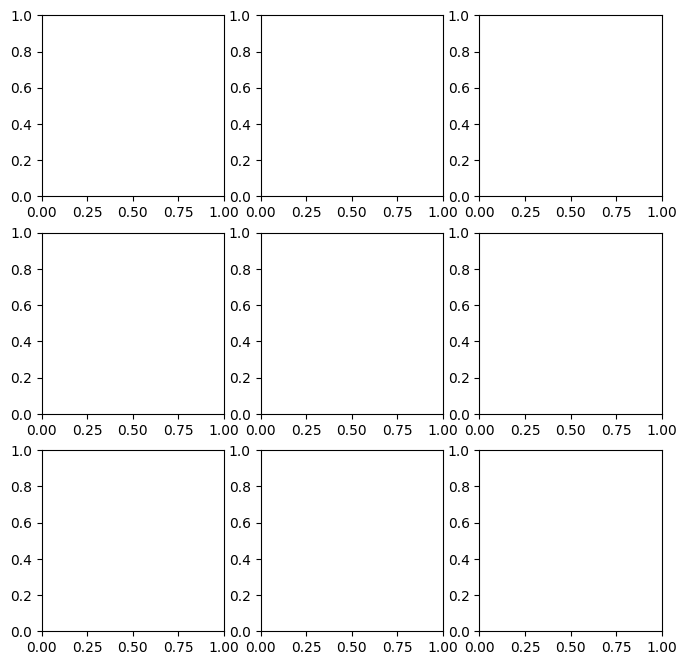

In [ ]:
dataset_module.variability_inter_style("Symbolism", df, 9) #PAREIL ERREUR

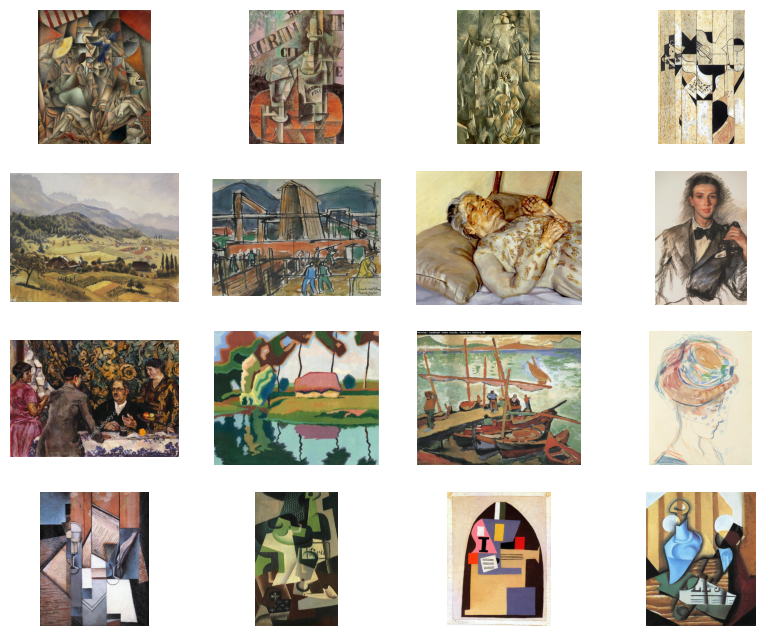

In [ ]:
dataset_module.variation_inter_style()

### PART3 : Répartition des genre, styles et artistes dans le dataset

#### Répartition des styles 

On observe la répartition des styles : 

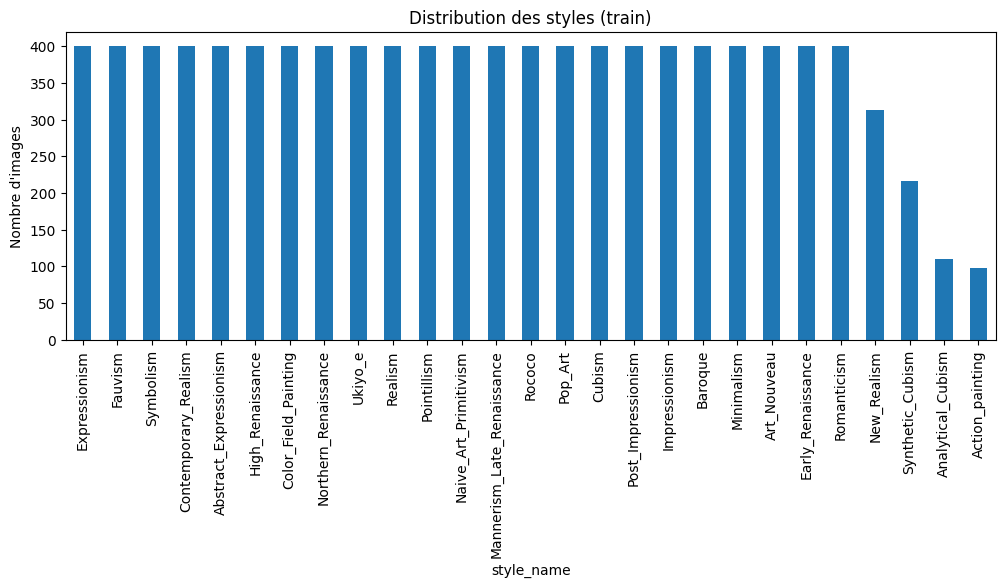

In [ ]:
dataset_module.visualize_style_repartition(df)

On remarque que la plupart des styles ont le nombre maximum d'image choisi pour le sous dataset crée : 400. Quatre styles font exception : new_realism, synthetic_cubism, analytical_cubism et action_painting. On devra choisir entre ne pas tenir compte de ces styles, ou les intégrer à des styles ressemblant (ex cubisme).

#### Répartition des genres

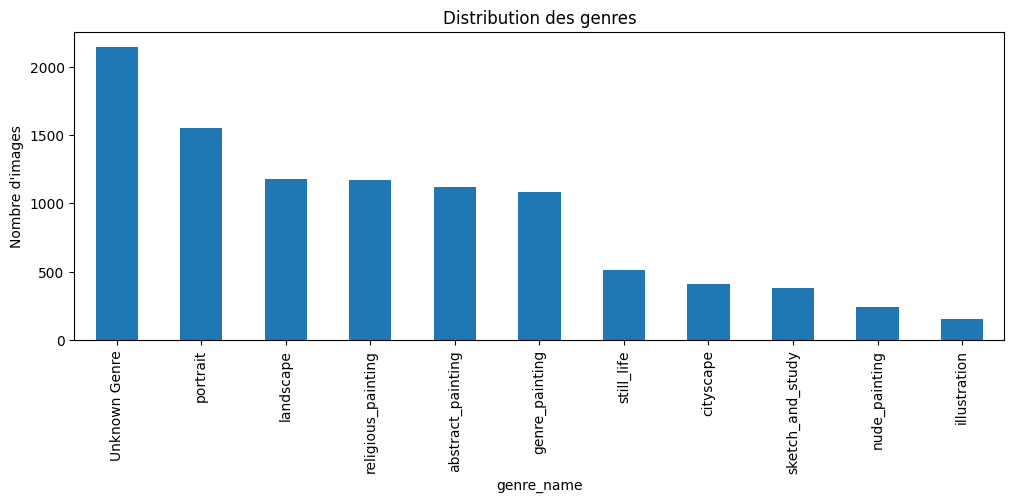

In [ ]:
dataset_module.visualize_genre_repartition(df, number_of_genre=20)

#### Répartition des artistes 

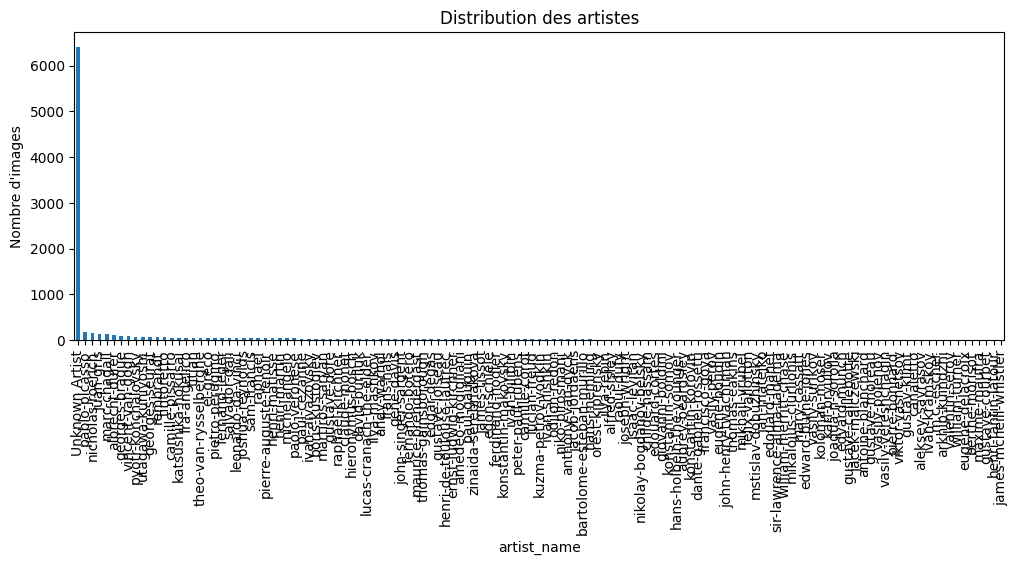

In [ ]:
dataset_module.visualize_artist_repartition(df)

Difficile de voir quelque chose, il faudrait voir le même histogramme sans "Unknown Artist". Cela nous permet tout de même de remarquer la présence écrasante d'artiste inconnus.

In [ ]:
#TODO : histogramme du nb d'image par artiste sans les artistes inconnus

#### Nombre d'artistes différents par style

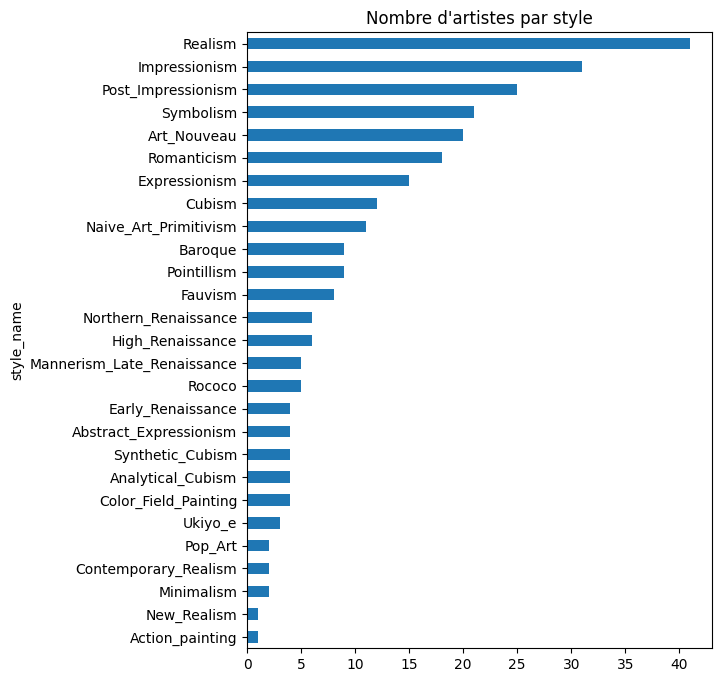

In [ ]:
dataset_module.count_nb_artist_per_style(df)

#### Artistes dominants :

In [ ]:
df["artist_name"].value_counts().head(15)

artist_name
Unknown Artist        6410
pablo-picasso          174
nicholas-roerich       158
juan-gris              131
marc-chagall           128
albrecht-durer         118
georges-braque         100
vincent-van-gogh        87
pyotr-konchalovsky      77
utagawa-kuniyoshi       70
georges-seurat          65
rembrandt               62
tintoretto              61
camille-pissarro        59
katsushika-hokusai      58
Name: count, dtype: int64

style dominées par qq artistes

In [ ]:
style = df["style_name"].unique()[0]

df[df["style_name"] == style]["artist_name"].value_counts().head(5)


artist_name
pablo-picasso     50
georges-braque    37
juan-gris         14
Unknown Artist     9
Name: count, dtype: int64

### PART 4 : TODO

Je sais plus trop comment organiser tout le reste donc hésitez pas a faire des modif/ rajouter ou vous voulez le reste de l'exploration de données

### RIEN COMPRIS :

chevauchement artiste entre split : pas bien compris

In [ ]:
train_artists = set(df_train["artist"])
val_artists   = set(df_val["artist"])
test_artists  = set(df_test["artist"])

len(train_artists & val_artists), len(train_artists & test_artists)


(110, 109)

artistes/style/genre manquants : bon fonctionne pas et jsp si c'est pertinent on le voit plus haut

In [ ]:
# NAN
def missing_stats(df, col):
    total = len(df)
    missing = df[col].isna().sum()
    pct = 100 * missing / total
    return missing, pct

for col in ["artist_name", "genre_name", "style_name"]:
    m, p = missing_stats(df, col)
    print(f"{col}: {m} manquants ({p:.2f}%)")

# unknown
def unknown_stats(df, col,name):
    total = len(df)
    unknown = (df[col].str.lower() == name).sum()
    pct = 100 * unknown / total
    return unknown, pct

for col in ["artist_name", "genre_name"]:
    u, p = unknown_stats(df, col, "0" if col=="artist_name" else "Unknown Genre")
    print(f"{col}: {u} unknown ({p:.2f}%)")



artist_name: 0 manquants (0.00%)
genre_name: 0 manquants (0.00%)
style_name: 0 manquants (0.00%)
artist_name: 0 unknown (0.00%)
genre_name: 0 unknown (0.00%)
